<img src="ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Brownian Motion
MSE FTP_MachLe HS2020

Christoph Würsch, Institute for Computational Engineering, ICE, OST



**In probability theory and related fields, a stochastic or random process is a mathematical object usually defined as a family of random variables. Many stochastic processes can be represented by time series.**

A stochastic process (also called random process) is the mathematical description of temporally ordered, random processes. The theory of stochastic processes represents a significant extension of probability theory and forms the basis for stochastic analysis. 


###  Time series and discrete stochastic processes [1]

Let $T$ be a set of equidistant time points $T = \left\lbrace t_1, t_2, \dots \right\rbrace$.

1. A **discrete stoachstic process** is a set of random variables $\lbrace X_1, X_2, \dots \rbrace$. Each
single random variable $X_i$ has a univariate distribution function $F_i$ and can be observed at time $t_i$.
2. A **time series** $\lbrace x_1, x_2, \dots \rbrace$ is a realization of a discrete stochastic process $\lbrace X_1, X_2, \dots \rbrace$. In other words, the value $x_i$ is a realization of the random variable $X_i$ measured at time $t_i$.

[1] Time Series Analysis and Its Applications by Robert H. Shumway and David S. Stoffner, Springer 2011.


**Example**: The **Wiener process** $W_{t}$ is characterised by the following properties:
1. $W_0=0$
2. $W$ has independent increments: for every $t>0$, the future increments $W_{t+u}-W_{t} \geq 0$, are *independent of the past values* $W_{s}$, $s\leq t$
3. $W$ has *Gaussian increments*: $W_{t+u}-W_{t}$ is normally distributed with mean $0$ and variance $u$, $W_{t+u}-W_{t}\sim \mathcal{N}(0,u).$ 
4. $W$ has continuous paths: $W_{t}$ is continuous in $t$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We simulate Brownian motions with 5000 time steps:

In [2]:
n = 5000

 We simulate two independent one-dimensional Brownian processes to form a single two-dimensional Brownian process. The (discrete) Brownian motion makes independent Gaussian jumps at each time step. Therefore, we merely have to compute the cumulative sum of independent normal random variables (one for each time step):

In [3]:
x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

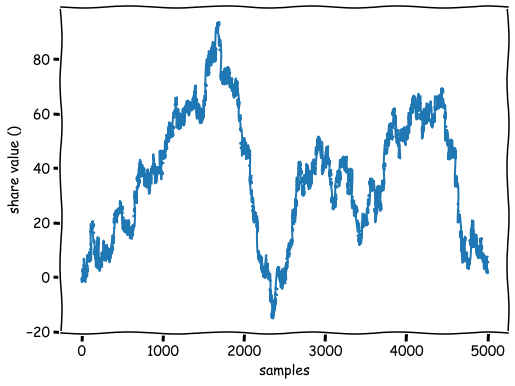

In [4]:
with plt.xkcd():
    plt.figure(figsize=(8,6))
    t=np.arange(n)
    plt.plot(t,x)
    plt.grid(True)
    plt.xlabel('samples')
    plt.ylabel('share value ()')

 Now, to display the Brownian motion, we could just use plot(x, y). However, the result would be monochromatic and a bit boring. We would like to use a gradient of color to illustrate the progression of the motion in time (the hue is a function of time). matplotlib does not support this feature natively, so we rather us scatter(). This function allows us to assign a different color to each point at the expense of dropping out line segments between points. To work around this issue, we linearly interpolate the process to give the illusion of a continuous line:

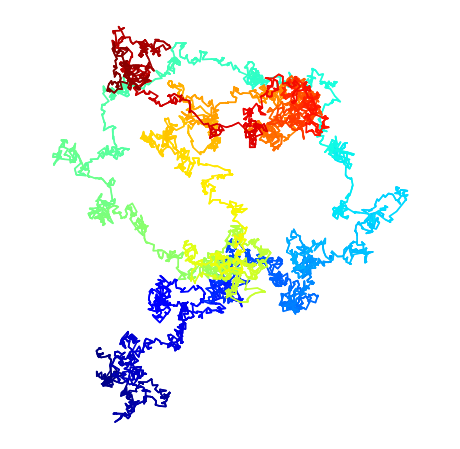

In [5]:
# We add 10 intermediary points between two
# successive points. We interpolate x and y.
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()